# Cont. Project. 

In [516]:
#Libraries and packages used for this Homework
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegressionCV

In [212]:
#Preparing data for Machine Learning Analysis
df0 = pd.read_csv(r"AXP_clean.csv")[5:]
df1 = pd.read_csv(r"BA_clean.csv")[5:]
df2 = pd.read_csv(r"CAT_clean.csv")[5:]
df3 = pd.read_csv(r"CSCO_clean.csv")[5:]
df4 = pd.read_csv(r"CVX_clean.csv")[5:]
df5 = pd.read_csv(r"DD_clean.csv")[5:]
df6 = pd.read_csv(r"DIS_clean.csv")[5:]
df7 = pd.read_csv(r"FB_clean.csv")[5:]
df8 = pd.read_csv(r"GE_clean.csv")[5:]
df9 = pd.read_csv(r"GS_clean.csv")[5:]
df10 = pd.read_csv(r"HD_clean.csv")[5:]
df11 = pd.read_csv(r"IBM_clean.csv")[5:]
df12 = pd.read_csv(r"INTC_clean.csv")[5:]
df13 = pd.read_csv(r"JNJ_clean.csv")[5:]
df14 = pd.read_csv(r"JPM_clean.csv")[5:]
df15 = pd.read_csv(r"KO_clean.csv")[5:]
df16 = pd.read_csv(r"MCD_clean.csv")[5:]
df17 = pd.read_csv(r"MMM_clean.csv")[5:]
df18 = pd.read_csv(r"MRK_clean.csv")[5:]
df19 = pd.read_csv(r"MSFT_clean.csv")[5:]
df20 = pd.read_csv(r"NKE_clean.csv")[5:]
df21 = pd.read_csv(r"PFE_clean.csv")[5:]
df22 = pd.read_csv(r"PG_clean.csv")[5:]
df23 = pd.read_csv(r"QQQ_clean.csv")[5:]
df24 = pd.read_csv(r"SPY_clean.csv")[5:]
df25 = pd.read_csv(r"TRV_clean.csv")[5:]
df26 = pd.read_csv(r"UNH_clean.csv")[5:]
df27 = pd.read_csv(r"UTX_clean.csv")[5:]
df28 = pd.read_csv(r"V_clean.csv")[5:]
df29 = pd.read_csv(r"VZ_clean.csv")[5:]
df30 = pd.read_csv(r"WMT_clean.csv")[5:]
df31 = pd.read_csv(r"XOM_clean.csv")[5:]

In [216]:
frames1 = [df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
           df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, 
           df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31]

In [550]:
df0 = pd.read_csv(r"AXP_clean.csv")[5:]

In [551]:
df=df0

In [552]:
df['Date'] = pd.to_datetime(df["Date"])
df = df.set_index(df['Date'])

### Part e) Chi-Squared Statistics

In [553]:
#Create 3 and 5 days returns bull and bear variable

df['3_bull_bear'] = np.where(df['3_day_return']>=0, "Bull_3", "Bear_3")
df['5_bull_bear'] = np.where(df['5_day_return']>=0, "Bull_5", "Bear_5")

#Creating dummy variable for Class in Training set
dummy_3=pd.get_dummies(df["3_bull_bear"])
dummy_3.head()
df=df.merge(dummy_3, left_index=True, right_index=True)

dummy_5=pd.get_dummies(df["5_bull_bear"])
dummy_5.head()
df=df.merge(dummy_5, left_index=True, right_index=True)

x= df.drop(["Bull_3","Bear_3","Bull_5","Bear_5",'3_bull_bear','5_bull_bear',"Date","OPEN","HIGH","LOW","VOLUME","CLOSE","3_day_return","5_day_return","tot_bull","tot_bear","tot_tweet","tweets","polarity","roll_avg","percent_change","mv10","tweets_no_stop","bodyn"], axis=1)          
y_3=pd.DataFrame(df["Bull_3"])
y_5=pd.DataFrame(df["Bull_5"])

In [554]:
#1,000 features for 3 days returns
X_3=SelectKBest(chi2,k=1000).fit_transform(x,y_3)
X_3=pd.DataFrame(X_3)

#1,000 features for 5 days returns
X_5=SelectKBest(chi2,k=1000).fit_transform(x,y_5)
X_5=pd.DataFrame(X_5)

In [555]:
X_3.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [556]:
X_5.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Data

In [557]:
X_train_3, X_test_3, y_train_3, y_test_3 =X_3[:588], X_3[589:], y_3[:588], y_3[589:]
X_train_5, X_test_5, y_train_5, y_test_5 =X_5[:588], X_5[589:], y_5[:588], y_5[589:]

### (f) Classification

### i) Explain how prediction of rt(T) can be converted into a binary classification problem and convert the responses to binary labels.

If we want to make it a binary problem then we could say that every data that a stock increased it's price its a Bullish action, and every time the price of a stock falls will be a bearish action. 

### Naive Bayes Clasiffier

#### 3 days return Train

Confusion Matrix
[[154  42]
 [  0 392]]


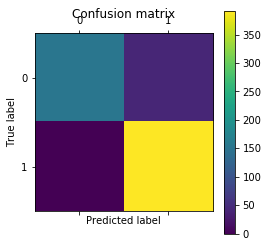

Accurancy= 92.85714285714286 %
AUC= 89.28571428571428 %
Recall= 100.0 %
Precision= 90.32258064516128 %
F1= 94.91525423728812 %


In [558]:
#3 days Return
##########
X_train=X_train_3
y_train=y_train_3

X_test=X_train_3
y_test=y_train_3
##########

clf = GaussianNB()
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 3 Days Return Test

Confusion Matrix
[[ 39  43]
 [ 20 132]]


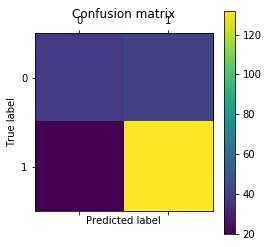

Accurancy= 73.07692307692307 %
AUC= 67.201540436457 %
Recall= 86.8421052631579 %
Precision= 75.42857142857143 %
F1= 80.73394495412846 %


In [559]:
#3 days Return
##########
X_train=X_train_3
y_train=y_train_3

X_test=X_test_3
y_test=y_test_3
##########

clf = GaussianNB()
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 5 Days Return Training data

Confusion Matrix
[[170  63]
 [  0 355]]


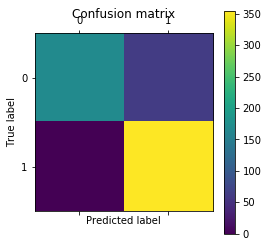

Accurancy= 89.28571428571429 %
AUC= 86.48068669527898 %
Recall= 100.0 %
Precision= 84.92822966507177 %
F1= 91.84993531694697 %


In [560]:
#5 days Return
##########
X_train=X_train_5
y_train=y_train_5

X_test=X_train_5
y_test=y_train_5
##########

clf = GaussianNB()
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 5 Days return Test data

Confusion Matrix
[[ 46  39]
 [ 19 130]]


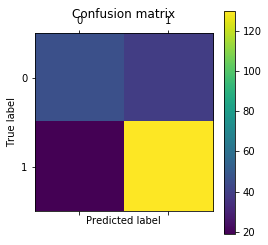

Accurancy= 75.21367521367522 %
AUC= 70.68298460323726 %
Recall= 87.24832214765101 %
Precision= 76.92307692307693 %
F1= 81.76100628930818 %


In [561]:
#5 days Return
##########
X_train=X_train_5
y_train=y_train_5

X_test=X_test_5
y_test=y_test_5
##########

clf = GaussianNB()
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### Logistic Regression

#### 3 days return training

Confusion Matrix
[[  5 191]
 [  0 392]]


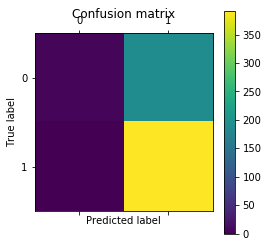

Accurancy= 67.51700680272108 %
AUC= 51.275510204081634 %
Recall= 100.0 %
Precision= 67.23842195540308 %
F1= 80.41025641025641 %


In [562]:
#3 days Return

##########
X_train=X_train_3
y_train=y_train_3

X_test=X_train_3
y_test=y_train_3
##########

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = RFE(model, 100, step=1)
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 3 days testing

Confusion Matrix
[[  0  82]
 [  2 150]]


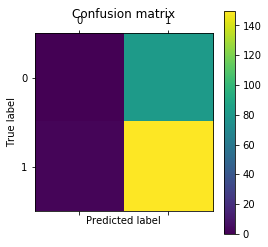

Accurancy= 64.1025641025641 %
AUC= 49.34210526315789 %
Recall= 98.68421052631578 %
Precision= 64.65517241379311 %
F1= 78.125 %


In [563]:
#3 days Return

##########
X_train=X_train_3
y_train=y_train_3

X_test=X_test_3
y_test=y_test_3
##########

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = RFE(model, 300, step=1)
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 5 days return training

Confusion Matrix
[[ 41 192]
 [  2 353]]


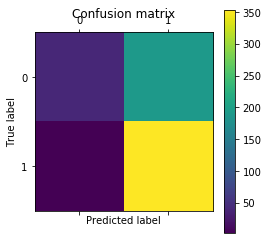

Accurancy= 67.00680272108843 %
AUC= 58.5165931209575 %
Recall= 99.43661971830986 %
Precision= 64.77064220183486 %
F1= 78.44444444444444 %


In [564]:
#5 days Return

##########
X_train=X_train_5
y_train=y_train_5

X_test=X_train_5
y_test=y_train_5
##########

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = RFE(model, 300, step=1)
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 5 days return test

Confusion Matrix
[[  1  84]
 [  0 149]]


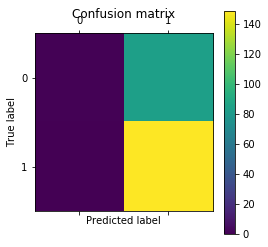

Accurancy= 64.1025641025641 %
AUC= 50.588235294117645 %
Recall= 100.0 %
Precision= 63.94849785407726 %
F1= 78.01047120418848 %


In [565]:
#5 days Return

##########
X_train=X_train_5
y_train=y_train_5

X_test=X_test_5
y_test=y_test_5
##########

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = RFE(model, 300, step=1)
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

### Logistic with 5 Fold CV and L1 Penalty

### 3 days return training 

Confusion Matrix
[[164  32]
 [  0 392]]


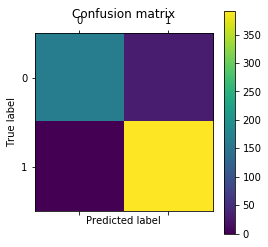

Accurancy= 94.5578231292517 %
AUC= 91.83673469387756 %
Recall= 100.0 %
Precision= 92.45283018867924 %
F1= 96.07843137254902 %


In [566]:
##########
X_train=X_train_3
y_train=y_train_3

X_test=X_train_3
y_test=y_train_3
##########

clf = LogisticRegressionCV(solver="liblinear",cv=5, random_state=0, penalty="l1")
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

### 3 days return test

Confusion Matrix
[[ 40  42]
 [ 30 122]]


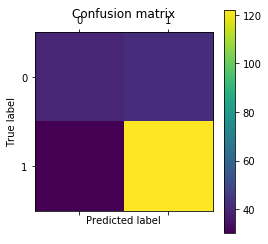

Accurancy= 69.23076923076923 %
AUC= 64.52182284980745 %
Recall= 80.26315789473685 %
Precision= 74.39024390243902 %
F1= 77.21518987341773 %


In [567]:
##########
X_train=X_train_3
y_train=y_train_3

X_test=X_test_3
y_test=y_test_3
##########

clf = LogisticRegressionCV(solver="liblinear",cv=5, random_state=0, penalty="l1")
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

### 5 days return train

Confusion Matrix
[[193  40]
 [  2 353]]


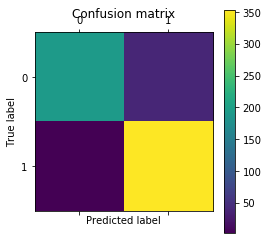

Accurancy= 92.85714285714286 %
AUC= 91.13461887203046 %
Recall= 99.43661971830986 %
Precision= 89.82188295165395 %
F1= 94.38502673796792 %


In [568]:
##########
X_train=X_train_5
y_train=y_train_5

X_test=X_train_5
y_test=y_train_5
##########

clf = LogisticRegressionCV(solver="liblinear",cv=5, random_state=0, penalty="l1")
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")

#### 5 days return test

Confusion Matrix
[[ 31  54]
 [ 25 124]]


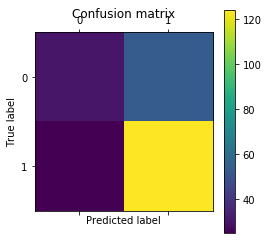

Accurancy= 66.23931623931624 %
AUC= 59.846032372680625 %
Recall= 83.22147651006712 %
Precision= 69.66292134831461 %
F1= 75.84097859327218 %


In [569]:
##########
X_train=X_train_5
y_train=y_train_5

X_test=X_test_5
y_test=y_test_5
##########

clf = LogisticRegressionCV(solver="liblinear",cv=5, random_state=0, penalty="l1")
clf = clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
y_score = clf.score(X_test, y_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc=metrics.auc(fpr, tpr)
recall=recall_score(y_test,y_pred)
precision= precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Confusion Matrix")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print( "Accurancy=", clf.score(X_test, y_test) *100, "%")
print("AUC=",auc*100, "%")
print("Recall=",recall*100, "%")
print("Precision=",precision*100, "%")
print("F1=",f1*100, "%")